In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

sns.set_style("whitegrid")


In [8]:
df = pd.read_csv(r"C:\Users\saiko\OneDrive\Desktop\BangaloreZomatoData.csv")
df.head()
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8923 entries, 0 to 8922
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              8923 non-null   object
 1   URL               8923 non-null   object
 2   Cuisines          8923 non-null   object
 3   Area              8923 non-null   object
 4   Timing            5820 non-null   object
 5   Full_Address      8923 non-null   object
 6   PhoneNumber       8923 non-null   object
 7   IsHomeDelivery    8923 non-null   int64 
 8   isTakeaway        8923 non-null   int64 
 9   isIndoorSeating   8923 non-null   int64 
 10  isVegOnly         8923 non-null   int64 
 11  Dinner Ratings    8923 non-null   object
 12  Dinner Reviews    8923 non-null   int64 
 13  Delivery Ratings  8923 non-null   object
 14  Delivery Reviews  8923 non-null   int64 
 15  KnownFor          258 non-null    object
 16  PopularDishes     1535 non-null   object
 17  PeopleKnownFor

In [3]:
# Check missing values
df.isnull().sum()


Name                   0
URL                    0
Cuisines               0
Area                   0
Timing              3103
Full_Address           0
PhoneNumber            0
IsHomeDelivery         0
isTakeaway             0
isIndoorSeating        0
isVegOnly              0
Dinner Ratings         0
Dinner Reviews         0
Delivery Ratings       0
Delivery Reviews       0
KnownFor            8665
PopularDishes       7388
PeopleKnownFor      5439
AverageCost            0
dtype: int64

In [ ]:
#dropping unnecessary coulmns
df.drop(columns=['URL', 'PhoneNumber', 'Full_Address'], inplace=True)


Cleaning columns

In [24]:
rating_cols = ['Dinner Ratings', 'Delivery Ratings']

for col in rating_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())


In [25]:
review_cols = ['Dinner Reviews', 'Delivery Reviews']

for col in review_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(0)
    df[col] = df[col].astype(int)


In [ ]:
df['AverageCost'] = pd.to_numeric(df['AverageCost'], errors='coerce') #coerce handles missing data and converts to nan 
df['AverageCost'] = df['AverageCost'].fillna(df['AverageCost'].median()) # fills the missing values with median


In [ ]:
cat_cols = ['Cuisines', 'Area', 'KnownFor', 'PopularDishes', 'PeopleKnownFor']

for col in cat_cols:
    df[col] = df[col].fillna('Unknown')  #replaces missing values with unknown


In [28]:
df['Avg_Rating'] = (
    df['Dinner Ratings'] + df['Delivery Ratings']
) / 2

df['Total_Reviews'] = (
    df['Dinner Reviews'] + df['Delivery Reviews']
)


In [29]:
df[['Dinner Ratings', 'Delivery Ratings',
    'Dinner Reviews', 'Delivery Reviews',
    'AverageCost']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8923 entries, 0 to 8922
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dinner Ratings    8923 non-null   float64
 1   Delivery Ratings  8923 non-null   float64
 2   Dinner Reviews    8923 non-null   int64  
 3   Delivery Reviews  8923 non-null   int64  
 4   AverageCost       8923 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 348.7 KB


In [33]:
df['Avg Rating'] = (df['Dinner Ratings'] + df['Delivery Ratings']) / 2
df['Total Reviews'] = df['Dinner Reviews'] + df['Delivery Reviews']


In [13]:
df['Dinner Ratings'] = pd.to_numeric(df['Dinner Ratings'].replace("-", np.nan), errors='coerce')
df['Delivery Ratings'] = pd.to_numeric(df['Delivery Ratings'].replace("-", np.nan), errors='coerce')


In [17]:
df['Dinner Ratings'].fillna(df['Dinner Ratings'].mean(), inplace=True)
df['Delivery Ratings'].fillna(df['Delivery Ratings'].mean(), inplace=True)


C:\Users\saiko\AppData\Local\Temp\ipykernel_38312\3918155433.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dinner Ratings'].fillna(df['Dinner Ratings'].mean(), inplace=True)
C:\Users\saiko\AppData\Local\Temp\ipykernel_38312\3918155433.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [18]:
df['Dinner Reviews'] = pd.to_numeric(df['Dinner Reviews'], errors='coerce').fillna(0)
df['Delivery Reviews'] = pd.to_numeric(df['Delivery Reviews'], errors='coerce').fillna(0)

In [30]:
df.dropna(inplace=True)


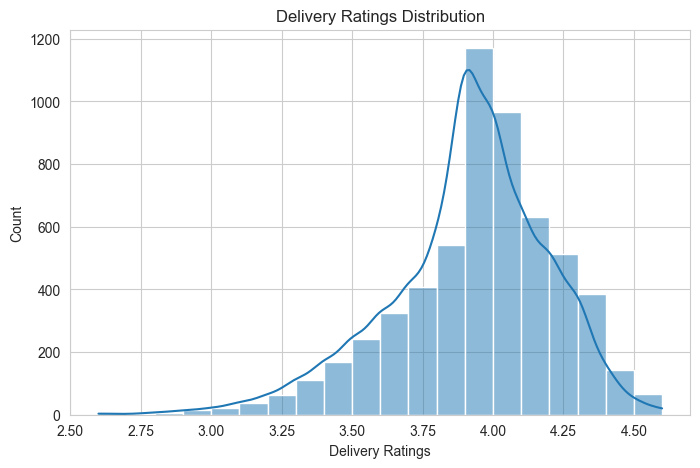

In [31]:


plt.figure(figsize=(8,5))
sns.histplot(df['Delivery Ratings'], bins=20, kde=True)
plt.title("Delivery Ratings Distribution")
plt.show()


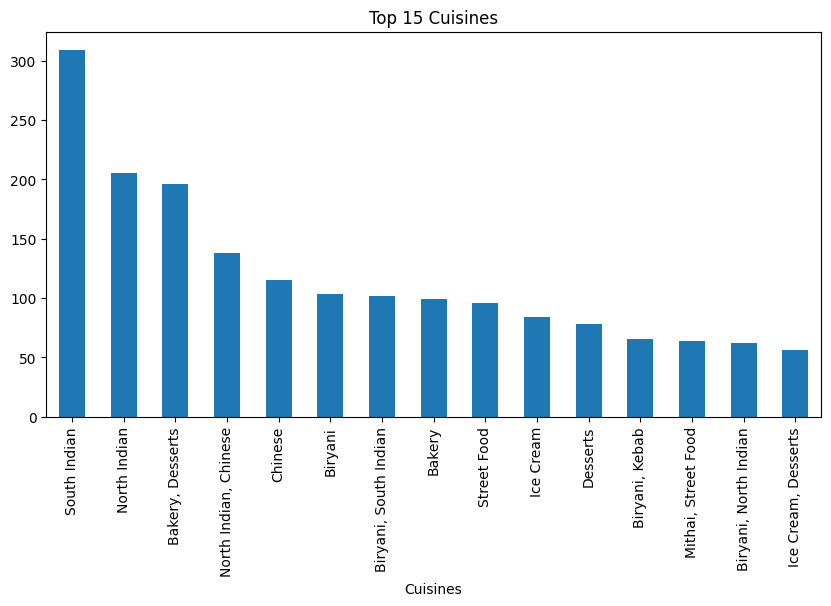

In [13]:
df['Cuisines'].value_counts().head(15).plot(
    kind='bar', figsize=(10,5), title="Top 15 Cuisines"
)
plt.show()


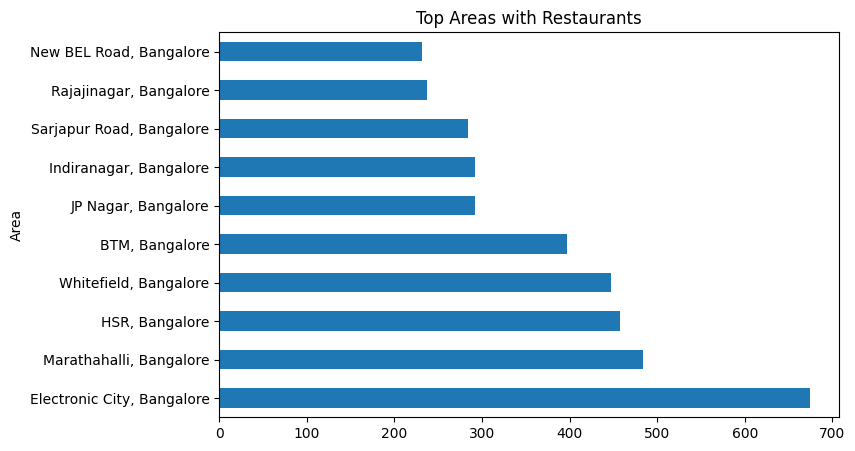

In [14]:
df['Area'].value_counts().head(10).plot(
    kind='barh', figsize=(8,5), title="Top Areas with Restaurants")
plt.show()


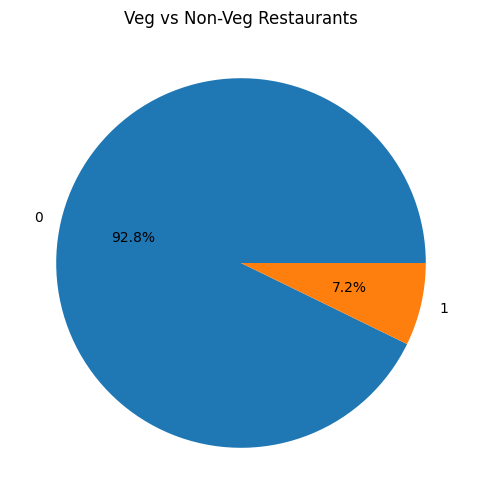

In [15]:
df['isVegOnly'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(6,6),
    title="Veg vs Non-Veg Restaurants")
plt.ylabel('')
plt.show()


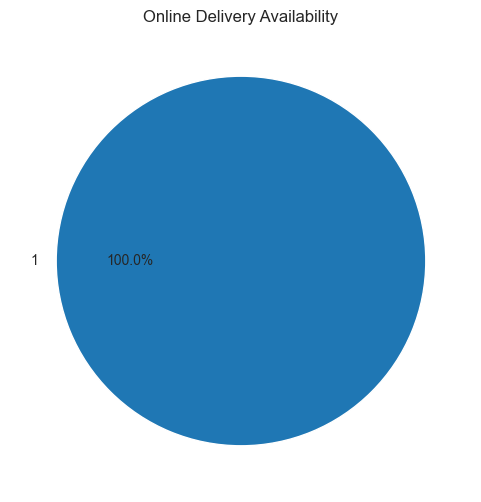

In [34]:
df['IsHomeDelivery'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(6,6),
    title='Online Delivery Availability'
)
plt.ylabel('')
plt.show()


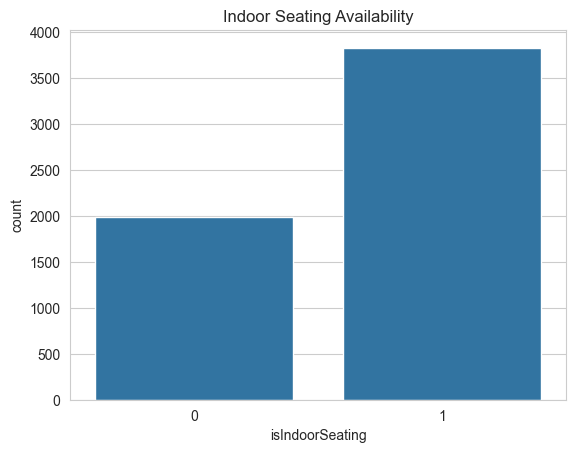

In [35]:
sns.countplot(x='isIndoorSeating', data=df)
plt.title("Indoor Seating Availability")
plt.show()


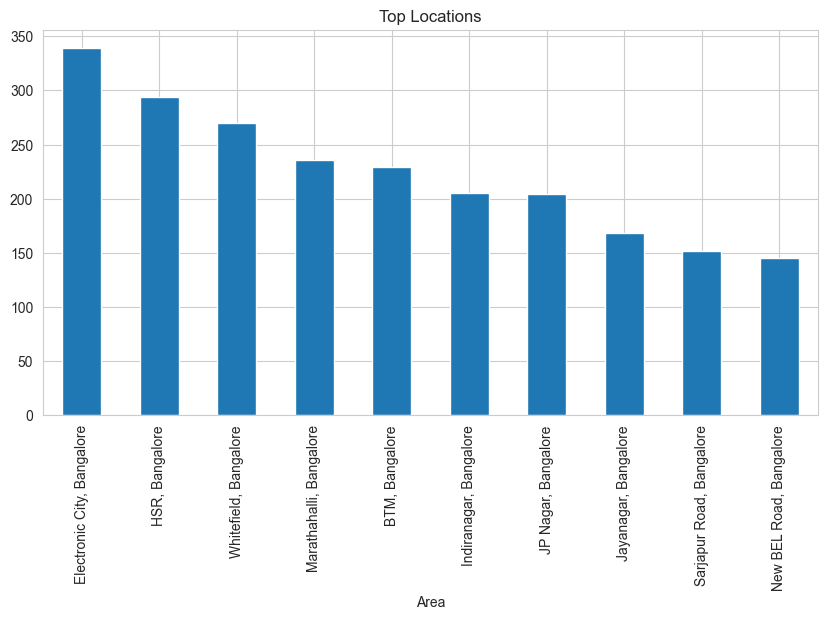

In [36]:
df['Area'].value_counts().head(10).plot(
    kind='bar', figsize=(10,5), title='Top Locations'
)
plt.show()


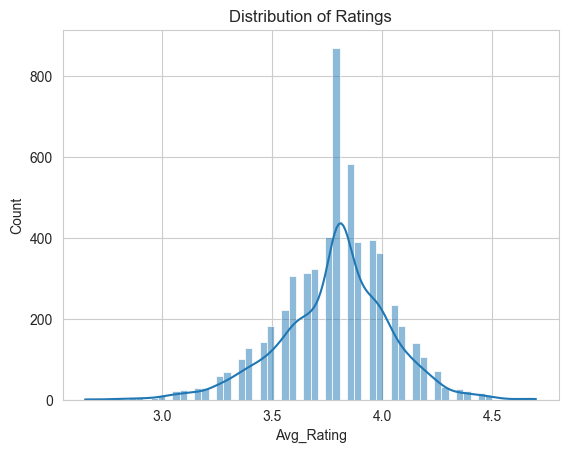

In [37]:
sns.histplot(df['Avg_Rating'], kde=True)
plt.title("Distribution of Ratings")
plt.show()


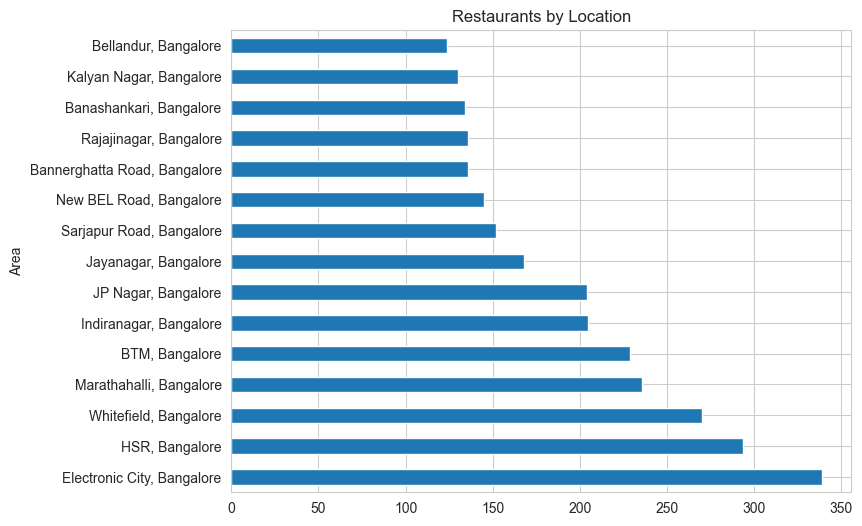

In [38]:
df['Area'].value_counts().head(15).plot(
    kind='barh', figsize=(8,6)
)
plt.title("Restaurants by Location")
plt.show()


In [39]:
le = LabelEncoder()
df['Area_enc'] = le.fit_transform(df['Area'])
df['Cuisine_enc'] = le.fit_transform(df['Cuisines'])


In [42]:
scaler = StandardScaler()
df[['AverageCost', 'Total Reviews']] = scaler.fit_transform(
    df[['AverageCost', 'Total Reviews']]
)


In [46]:
X = df[['AverageCost', 'Total Reviews', 'Area_enc', 'Cuisine_enc']]
y = df['Avg Rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Linear Regression

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R2: 0.07300000627289582
Linear Regression RMSE: 0.23937853493966615


In [2]:
from sklearn.model_selection import train_test_split


In [9]:
df = pd.read_csv(r"C:\Users\saiko\OneDrive\Desktop\BangaloreZomatoData.csv")


In [27]:
features = [
    'IsHomeDelivery',
    'isTakeaway',
    'isIndoorSeating',
    'isVegOnly',
    'Dinner Ratings',
    'Dinner Reviews',
    'Delivery Ratings',
    'Delivery Reviews'
]

target = 'AverageCost'

In [28]:
for col in features + [target]:
    df[col] = pd.to_numeric(df[col].replace("-", np.nan), errors='coerce')


In [29]:
df['Dinner Ratings'].fillna(df['Dinner Ratings'].mean(), inplace=True)
df['Delivery Ratings'].fillna(df['Delivery Ratings'].mean(), inplace=True)
df['Dinner Reviews'].fillna(0, inplace=True)
df['Delivery Reviews'].fillna(0, inplace=True)
df['IsHomeDelivery'].fillna(df['IsHomeDelivery'].mode()[0], inplace=True)
df['isTakeaway'].fillna(df['isTakeaway'].mode()[0], inplace=True)
df['isIndoorSeating'].fillna(df['isIndoorSeating'].mode()[0], inplace=True)
df['isVegOnly'].fillna(df['isVegOnly'].mode()[0], inplace=True)
df['AverageCost'].fillna(df['AverageCost'].median(), inplace=True)

C:\Users\saiko\AppData\Local\Temp\ipykernel_38312\424244842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dinner Ratings'].fillna(df['Dinner Ratings'].mean(), inplace=True)
C:\Users\saiko\AppData\Local\Temp\ipykernel_38312\424244842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [30]:
df = df.dropna(subset=[
    'Dinner Ratings',
    'Delivery Ratings',
    'Dinner Reviews',
    'Delivery Reviews',
    'IsHomeDelivery',
    'isTakeaway',
    'isIndoorSeating',
    'isVegOnly',
    'AverageCost'
])


In [31]:
X = df[
    [
        'IsHomeDelivery',
        'isTakeaway',
        'isIndoorSeating',
        'isVegOnly',
        'Dinner Ratings',
        'Dinner Reviews',
        'Delivery Ratings',
        'Delivery Reviews'
    ]
]
y = df['AverageCost']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [33]:
model = LinearRegression()
model.fit(X_train, y_train) 


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [34]:
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 114325.19809957259
R2 Score: 0.24794462503147785


In [35]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_})
print(coef_df)

            Feature  Coefficient
0    IsHomeDelivery   603.712306
1        isTakeaway  -422.680287
2   isIndoorSeating   126.686037
3         isVegOnly  -101.707200
4    Dinner Ratings   185.209061
5    Dinner Reviews     0.134012
6  Delivery Ratings   -93.480718
7  Delivery Reviews    -0.007884


In [36]:
# Example: High cost = 1 if AverageCost > 1000, else 0
df['HighCost'] = (df['AverageCost'] > 1000).astype(int)


In [ ]:
features = ['IsHomeDelivery', 'isTakeaway', 'isIndoorSeating', 'isVegOnly',
    'Dinner Ratings', 'Dinner Reviews', 'Delivery Ratings', 'Delivery Reviews']

X = df[features]
y = df['HighCost']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


### Decision Tree

In [48]:
dt = DecisionTreeRegressor(max_depth=8, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree R2:", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Decision Tree R2: 0.1500493962970879
Decision Tree RMSE: 0.22921455012601571


### Random Forest

In [49]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest R2: 0.23605061855942888
Random Forest RMSE: 0.2173089587449047
